# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [0]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [0]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cavendish, Mr. Tyrell William",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [0]:
# Find missing values
titanic.isna

<bound method DataFrame.isna of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [0]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [0]:
# Check Datatype
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
#the missing values of column age with the mean of that column
titanic.Age = titanic.Age.fillna(titanic.Age.mean())

In [0]:
#check the imputed
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
#the missing values of column Cabin with a constant value 'other'
titanic.Cabin = titanic.Cabin.fillna("other")

In [0]:
#check the imputed
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [0]:
# find Embarked mode
titanic.Embarked.mode()


0    S
dtype: object

In [0]:
# the missing values of column Embarked with the mode of that column
titanic.Embarked.fillna('S',inplace = True)

In [0]:
#check the imputed
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [0]:
# Check data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,other,S


In [0]:
#sort
t_expensive=titanic.sort_values('Fare', axis=0, ascending=False)

In [0]:
#output 16th
t_expensive.iloc[15,:]

PassengerId                   528
Survived                        0
Pclass                          1
Name           Farthing, Mr. John
Sex                          male
Age                       29.6991
SibSp                           0
Parch                           0
Ticket                   PC 17483
Fare                      221.779
Cabin                         C95
Embarked                        S
Name: 527, dtype: object

### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [0]:
# filter by female
t_expensive_female= t_expensive.loc[titanic['Sex']=='female',:]
t_expensive_female.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,other,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [0]:
#output 6th
t_expensive_female.iloc[5,:]

PassengerId                                                300
Survived                                                     1
Pclass                                                       1
Name           Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Sex                                                     female
Age                                                         50
SibSp                                                        0
Parch                                                        1
Ticket                                                PC 17558
Fare                                                   247.521
Cabin                                                  B58 B60
Embarked                                                     C
Name: 299, dtype: object

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [0]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


For all classes, female have higher survial rates, and the higher one's class is, the higher survival rate is. However, 3nd class female passengers have a much lower survival rate compared to its peers. Among males, the first class passengers have a much higher survivial rate compared to 2nd and 3rd class passengers. 

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

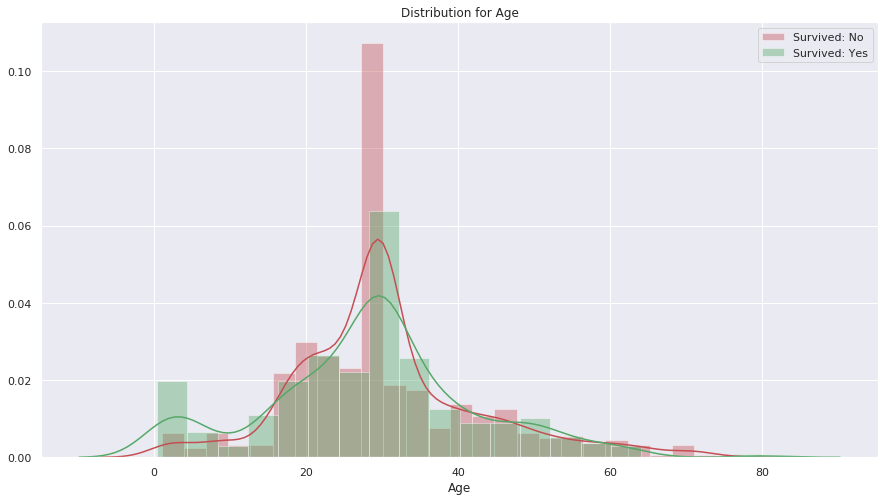

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

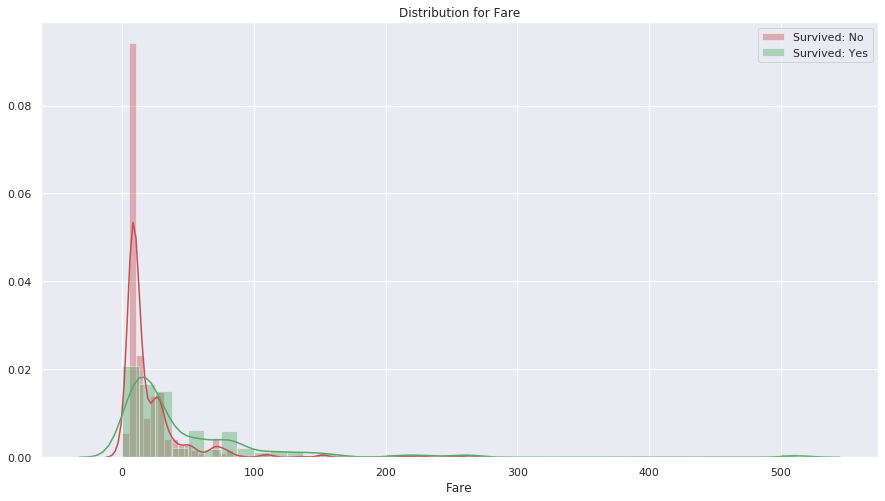

In [0]:
# TODO

def distplot(feature, frame):
    plt.figure(figsize=(15,8))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'r', label='Survived: No')
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survived: Yes')
    plt.legend()
    plt.show()
numerical_cols = ['Age', 'Fare']

display(titanic['Age'].describe())
distplot('Age', titanic)

display(titanic['Fare'].describe())
distplot('Fare', titanic)


Age has a normal distribution for total passengers. For children, they are more likely to survive. For adults who age around 20 and 30, it is more likely to not survive.
Corresponding to the previous finding from Q6, that 1st and 2nd class passengers are more likely to survive, the fare distribution among the survived and unsurvived confirmed that the lower one's fare is, the more likely one is a Titanic victim.


### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


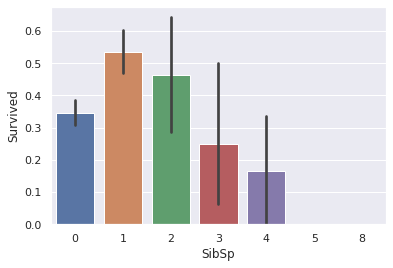

In [0]:
# TODO
sns.barplot(x= 'SibSp', y='Survived',data= titanic)
titanic[["SibSp","Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


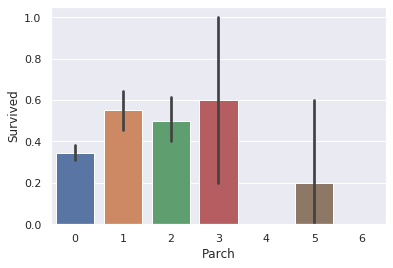

In [0]:
sns.barplot(x= 'Parch', y='Survived',data= titanic)
titanic[["Parch","Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.123648,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030467
Survived,-0.005007,1.000000,0.247845,-0.005007,0.543351,0.037025,-0.136302,0.086210,-0.047298,0.191981,0.270495,0.106811
Pclass,0.018305,0.247845,1.000000,0.018305,0.118133,0.171190,-0.149630,-0.000343,0.020431,0.079498,0.187437,-0.168091
Name,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.123648,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030467
Sex,-0.042939,0.543351,0.118133,-0.042939,1.000000,0.005005,-0.046152,0.242417,-0.132709,0.137725,0.082104,0.116569
Age,0.123648,0.037025,0.171190,0.123648,0.005005,1.000000,0.010067,0.132659,0.074814,0.117313,0.163002,-0.133308
SibSp,-0.031023,-0.136302,-0.149630,-0.031023,-0.046152,0.010067,1.000000,0.165255,-0.122426,-0.046556,-0.108709,-0.030683
Parch,0.001206,0.086210,-0.000343,0.001206,0.242417,0.132659,0.165255,1.000000,-0.262607,0.074306,-0.002761,-0.085059
Ticket,0.760875,-0.047298,0.020431,0.760875,-0.132709,0.074814,-0.122426,-0.262607,1.000000,0.303257,0.212438,-0.024655
Fare,0.299982,0.191981,0.079498,0.299982,0.137725,0.117313,-0.046556,0.074306,0.303257,1.000000,0.379659,0.076726


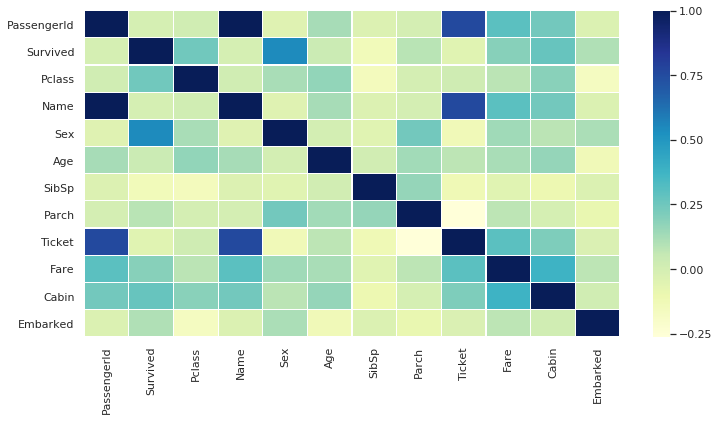

In [0]:
#TODO
plt.figure(figsize=(12, 6))
corr = titanic[['PassengerId','Survived','Pclass','Name','Sex','Age',
                'SibSp','Parch','Ticket','Fare','Cabin','Embarked']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

The strongest correlation to Survived is: sex (0.54), cabin (0.27), which is associate with class, and Pclass (0.25).

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

In [0]:
# Senior Passenger
titanic_senior = titanic.loc[(titanic['Age'] >= 55),:]
titanic_senior.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,other,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,other,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,other,S


In [0]:
titanic_senior.sum()

PassengerId                                                18037
Survived                                                      13
Pclass                                                        64
Name           Bonnell, Miss. ElizabethHewlett, Mrs. (Mary D ...
Sex            femalefemalemalemalemalemalemalemalemalemalefe...
Age                                                         2604
SibSp                                                          6
Parch                                                         12
Ticket         113783248706C.A. 24579113509364500PC 177543703...
Fare                                                     1873.73
Cabin          C103otherotherB30otherA5otherotherB19A7B80othe...
Embarked              SSSCSCQSSCCSSSSQSCSSSSCSCSSSCSQSCCSSSSSSSC
dtype: object

count    42.000000
mean     62.000000
std       5.705154
min      55.000000
25%      58.000000
50%      61.000000
75%      64.750000
max      80.000000
Name: Age, dtype: float64

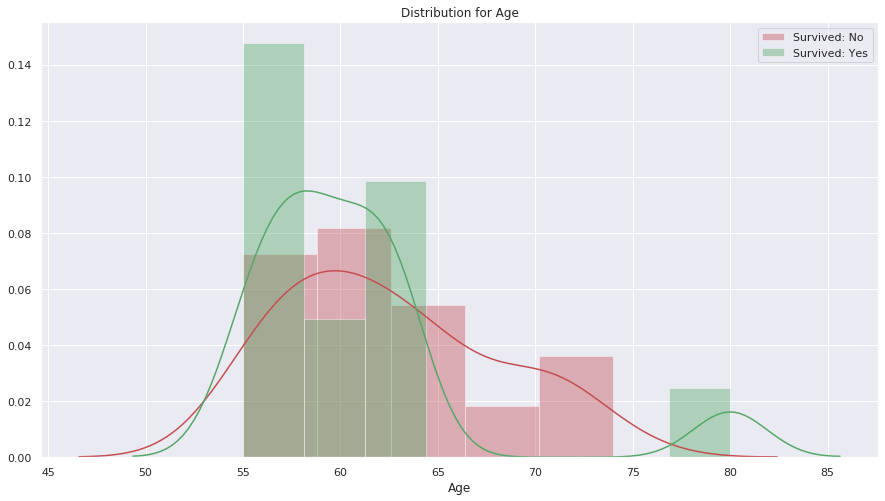

In [0]:
def distplot(feature, frame):
    plt.figure(figsize=(15,8))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'r', label='Survived: No')
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survived: Yes')
    plt.legend()
    plt.show()
numerical_cols = ['Age']

display(titanic_senior['Age'].describe())
distplot('Age', titanic_senior)


Age was filters to over 60 to examine if there is any significant difference in survival rates for the elderely. Although the chart seems to indicate drastic difference, the sample size of each age is very small, and therefore I can't reach a confident solution.

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [0]:
# TODO
t_reg = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
display(t_reg.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
t_reg.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
t_reg.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
t_reg.Age.fillna(t_reg.Age.mean(),inplace=True)
t_reg.Fare.fillna(t_reg.Fare.mean(),inplace=True)
t_reg.Cabin.fillna(method='ffill',inplace = True)

In [0]:
t_reg.isna().sum()
#don't know why Cabin still has 12 null values

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          12
Embarked        0
dtype: int64

In [0]:
 titanic_drop= titanic.drop(columns=['PassengerId', 'Name','Ticket','Cabin'])
 t_reg_drop = t_reg.drop(columns=['PassengerId', 'Name','Ticket','Cabin'])
 

In [0]:
titanic_dum = pd.get_dummies(titanic_drop, columns=['Sex','Embarked'])
t_reg_dum = pd.get_dummies(t_reg_drop, columns=['Sex','Embarked'])

In [0]:
titanic_dum.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [0]:
t_reg_dum.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [0]:
titanic_dum = titanic_dum.drop(columns=['Sex_female','Embarked_C'])
t_reg_dum = t_reg_dum.drop(columns=['Sex_female','Embarked_C'])

In [0]:
# importing librariesimport numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
sns.set()

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

warnings.simplefilter(action='ignore', category=FutureWarning)


In [0]:
titanic_dum.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male        uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [0]:
titanic_dum =titanic_dum.astype('float64')
t_reg_coded =t_reg_dum.astype('float64')

In [0]:
titanic_dum.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [0]:
log = LogisticRegression()
log.fit(titanic_coded.loc[:, ['Pclass','Age','SibSp','Parch','Fare',
                              'Sex_male','Embarked_S','Embarked_Q']], titanic_dum['Survived'])
print('Slope: {}'.format(log.coef_))
print('Intercept: {}'.format(log.intercept_))


Slope: [[-1.09505994e+00 -3.98888733e-02 -3.22200166e-01 -6.81014757e-02
   2.24085228e-03 -2.60012082e+00 -2.85091020e-01  2.41635078e-01]]
Intercept: [5.06365626]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
